<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/AutoEncoder_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np; import matplotlib.pyplot as plt
from keras.datasets import mnist; from keras.models import Sequential
from keras.layers import Dense, InputLayer
(x_train, _), (x_test, _) = mnist.load_data() # Load the dataset
# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
encoding_dim = 3 # for more accurate results encoding_dim should be more than 3

In [9]:
# Design the model
autoencoder = Sequential([
  InputLayer(shape=(784,)),
  Dense(encoding_dim, activation='relu'),
  Dense(784, activation='sigmoid')
])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
 autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4905 - val_loss: 0.2760
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2706 - val_loss: 0.2484
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2453 - val_loss: 0.2346
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2348 - val_loss: 0.2303
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2315 - val_loss: 0.2278
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2297 - val_loss: 0.2262
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2277 - val_loss: 0.2247
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2263 - val_loss: 0.2236
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2254 - val_loss: 0.2228
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2243 - val_loss: 0.2220
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2236 - val_loss: 0.2212
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


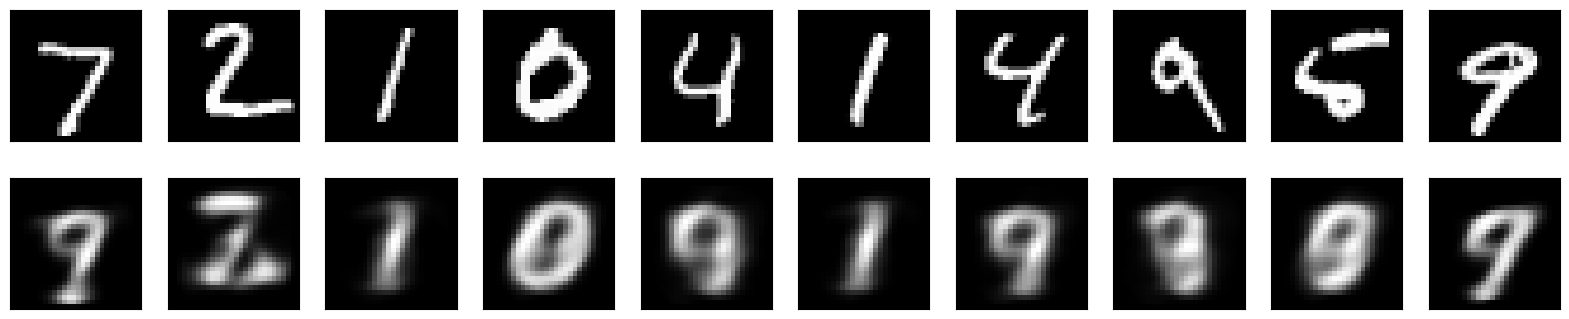

In [11]:
decoded_imgs = autoencoder.predict(x_test)
# Visualize the results
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  # Display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
